# **Linear Regression Using Normal Equation**

This notebook shows the implementation of linear regression using:
1. The Normal Equation method
2. Scikit-Learn's LinearRegression

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

---

## **1. Data Generation**

Let's create synthetic linear data with some random noise.


In [53]:
# Set parameters
np.random.seed(42)
n_samples = 200
true_slope = 5
true_intercept = 2
noise_level = 4

# Generate features (X) and target (y)
X = np.random.rand(n_samples, 1) * 10
gaussian_noise = np.random.normal(0, noise_level, (n_samples, 1))

y_true = true_slope * X + true_intercept
y = y_true + gaussian_noise

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (200, 1), y shape: (200, 1)



### **Visualizing the Data**


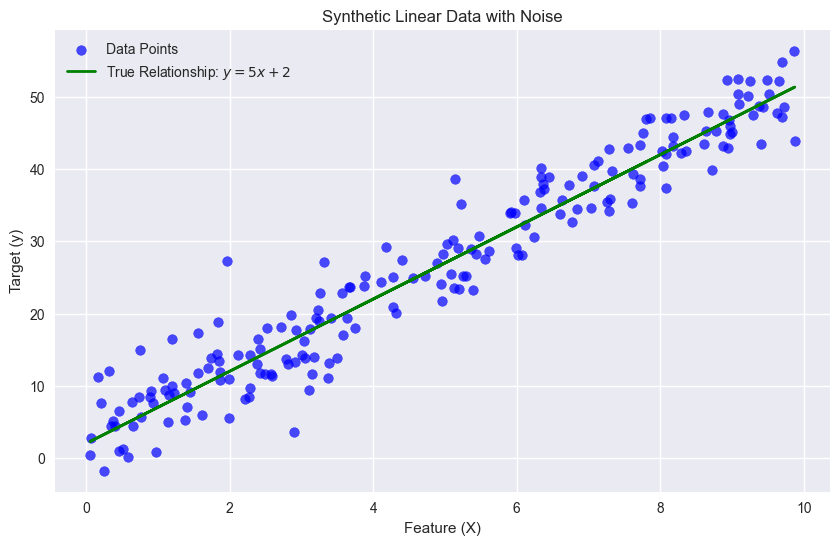

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.7)
plt.plot(
    X,
    y_true,
    color="green",
    linewidth=2,
    label=f"True Relationship: $y = {true_slope}x + {true_intercept}$",
)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Synthetic Linear Data with Noise")
plt.legend()
plt.grid(True)
plt.show()

---


## **2. Linear Regression with Normal Equation**



The normal equation provides a closed-form solution for linear regression:
$$\theta = (X^TX)^{-1}X^Ty$$

Where:
- $\theta$ is the parameter vector (including intercept)
- $X$ is the feature matrix with an added column of ones for the intercept term


In [55]:
# Add bias term (column of ones) to X
X_b = np.c_[np.ones((n_samples, 1)), X]
X_b.shape

(200, 2)

In [56]:
X_b[:4]

array([[1.        , 3.74540119],
       [1.        , 9.50714306],
       [1.        , 7.31993942],
       [1.        , 5.98658484]])

In [57]:
def normal_equation(X, y):
    """Compute optimal parameters using normal equation"""
    X_T = X.T
    theta_best = np.linalg.inv(X_T @ X) @ X_T @ y
    return theta_best

In [58]:
# Calculate optimal parameters
theta_best = normal_equation(X_b, y)
theta_best

array([[2.4208046 ],
       [4.96877157]])

In [59]:
intercept, slope = theta_best[0][0], theta_best[1][0]

print(f"Normal Equation Results:")
print(f"Shape: {theta_best.shape}")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Function: y = {slope:.4f}x + {intercept:.4f}")

Normal Equation Results:
Shape: (2, 1)
Intercept: 2.4208
Slope: 4.9688
Function: y = 4.9688x + 2.4208


### **Making Predictions**

In [60]:
def predict(X, theta):
    """Make predictions using the computed parameters"""
    return X @ theta


y_pred_normal = predict(X_b, theta_best)

---


## **3. Linear Regression with Scikit-Learn**

Let's compare our implementation with Scikit-Learn's LinearRegression.


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# Initialize and fit model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [63]:
# Get parameters
sk_intercept = lin_reg.intercept_[0]
sk_slope = lin_reg.coef_[0][0]

print("Scikit-Learn Results:")
print(f"Intercept: {sk_intercept:.4f}")
print(f"Slope: {sk_slope:.4f}")
print(f"Function: y = {sk_slope:.4f}x + {sk_intercept:.4f}")

Scikit-Learn Results:
Intercept: 2.4208
Slope: 4.9688
Function: y = 4.9688x + 2.4208


In [64]:
# Make predictions
y_pred_sklearn = lin_reg.predict(X)

---


## **4. Results Visualization**


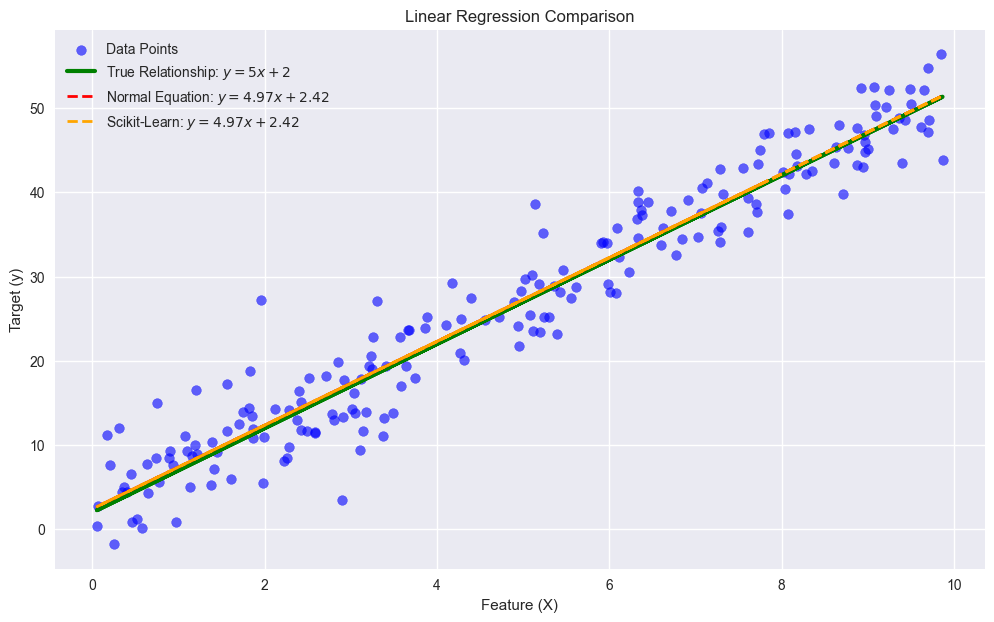

In [65]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)

# Plot true relationship
plt.plot(
    X,
    y_true,
    color="green",
    linewidth=3,
    label=f"True Relationship: $y = {true_slope}x + {true_intercept}$",
)

# Plot predicted relationships
plt.plot(
    X,
    y_pred_normal,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Normal Equation: $y = {slope:.2f}x + {intercept:.2f}$",
)
plt.plot(
    X,
    y_pred_sklearn,
    color="orange",
    linestyle="--",
    linewidth=2,
    label=f"Scikit-Learn: $y = {sk_slope:.2f}x + {sk_intercept:.2f}$",
)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Comparison")
plt.legend()
plt.grid(True)
plt.show()

---

## **5. Model Evaluation**

Let's evaluate both models using R-squared score.


In [66]:
from sklearn.metrics import r2_score

In [67]:
# Calculate R-squared scores
r2_normal = r2_score(y, y_pred_normal)
r2_sklearn = r2_score(y, y_pred_sklearn)

print("Model Performance:")
print(f"Normal Equation R-squared: {r2_normal:.4f}")
print(f"Scikit-Learn R-squared:    {r2_sklearn:.4f}")

Model Performance:
Normal Equation R-squared: 0.9346
Scikit-Learn R-squared:    0.9346


---

## **6. Final Model Verification**

Both implementations produce identical linear regression models, confirming the mathematical correctness of our implementation. Here are the final model equations:

In [68]:
print("Final Model Equations: y = mx + b")
print(f"Normal Equation: y = {slope:.10f}x + {intercept:.10f}")
print(f"Scikit-Learn:    y = {sk_slope:.10f}x + {sk_intercept:.10f}")

Final Model Equations: y = mx + b
Normal Equation: y = 4.9687715727x + 2.4208046038
Scikit-Learn:    y = 4.9687715727x + 2.4208046038


---